In [ ]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
import os
import pyreadstat

data_path = '/content/drive/MyDrive/_data/'
file = data_path+'LLCP2015.XPT_'

In [ ]:
os.listdir(data_path)

["Italian Parkinson's Voice and speech",
 'Lymphoma',
 'XRay_chest_pnemonia',
 'Elephant',
 'ML_HW3',
 'LLCP2015.XPT ']

In [ ]:
df_2015 = pd.read_sas('/content/drive/MyDrive/_data/LLCP2015.XPT ')

In [ ]:
df_2015.dropna(subset = ['CIMEMLOS'], inplace=True)

In [ ]:
df_2015 = df_2015[df_2015['CIMEMLOS'] < 3]
df_2015.shape

(115682, 330)

In [ ]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=12KieiuP24jrrpTQqT4lj9L5iUXyr63s1')


In [ ]:
for col in df_2015.columns:
  print(col)

In [ ]:
# features_kept=['_SEX', '_AGE80', 'RRCLASS3', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'GENHLTH',
#                'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', 'EMTSUPRT', #'_MICHD',
#                'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
#                'ADDEPEV3', 'SMOKE100', 'EXERANY2', 'CIMEMLOS']

features_kept=['SEX', '_AGE80', '_EDUCAG', 'INCOME2', 'EMPLOY1', 'GENHLTH',
                'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', 'EMTSUPRT', #'_MICHD',
               'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
               'ADDEPEV2', 'SMOKE100', 'EXERANY2', 'CIMEMLOS']

features_kept2 = ['SEXVAR','GENHLTH','MENTHLTH','EXERANY2','SLEPTIM1',
                  'CVDINFR4','CHCOCNC1','ADDEPEV3','CHCKDNY2','DIABETE4','MARITAL','VETERAN3','WEIGHT2','HEIGHT3',
                  'DEAF','BLIND','DECIDE','DIFFWALK','DIFFDRES','DIFFALON','COVIDPOS',
                  'CIMEMLOS','LSATISFY','EMTSUPRT','SDHISOLT','SDHEMPLY',
                  'SDHFOOD1','SDHBILLS','SDHUTILS','SDHTRNSP','SDHSTRE1','_URBSTAT','_IMPRACE','_RFHLTH','_PHYS14D','_MENT14D',
                  '_TOTINDA','_MICHD','_ASTHMS1','_DRDXAR2','_AGE80','_CHLDCNT','_EDUCAG','_INCOMG1','_SMOKER3','_CURECI2','_DRNKWK2',
                  '_AIDTST4','_RFBMI5']

df2 = df_2015[features_kept]; df3 = df[features_kept2]

In [ ]:
# a = df3[['_RFBMI5', 'CIMEMLOS']]
# a = a[(a['_RFBMI5'] < 7) & (a['CIMEMLOS'] < 3)]

# sns.histplot(data=a, x='_RFBMI5', hue='CIMEMLOS')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
from scipy.stats import pointbiserialr

# column = '_RFBMI5';
# unknown = 9
# refused = 7
# test = df[[column, 'CIMEMLOS']]
# remove_idx = test[(test[column] == unknown) | (test[column] == refused)].index
# test = test.dropna(subset = [column])
# test = test.drop(index=remove_idx)
# corr, _ = pointbiserialr(test[column], test.CIMEMLOS)
# print(corr)


In [ ]:
# a = df3[['MENTHLTH', 'CIMEMLOS']]
# a = a[(a['MENTHLTH'] < 31) & (a['CIMEMLOS'] < 3)].sort_values(by=['MENTHLTH'], ascending=False)
# # g = a.groupby('CIMEMLOS')

# sns.histplot(data=a, x='MENTHLTH', hue='CIMEMLOS', kde=True)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
def binary_process(df, column):
  remove_idx = df[(df[column] == 9) | (df[column] == 7)].index
  df2 = df.dropna(subset = [column])
  df2 = df2.drop(index=remove_idx)
  df2[column] = df2[column].astype(int)
  df2[column] = df2[column].replace(2, 0)
  return df2

In [ ]:
def get_binary_columns(df):
    binary_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) == 2:
            binary_columns.append(column)
    return binary_columns

# binary_columns = get_binary_columns(X)
# cont_columns = [column for column in X.columns if column not in binary_columns]

In [ ]:
def remove_blanks(df, column, unknown=7, refused=9):
  remove_idx = df[(df[column] == unknown) | (df[column] == refused)].index
  df2 = df.dropna(subset = [column])
  df2 = df2.drop(index=remove_idx)
  return df2

In [ ]:
df3 = binary_process(df2, 'SEX')
# df3 = remove_blanks(df3, '_CRACE1', unknown=77, refused=99)
# df3

In [ ]:
## RRCLASS3 race
# mapping = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian', 5: 'Native Hawaiian', 6: 'American Indian', 7: 'Mixed', 8:'Others'}
# df3._CRACE1 = df3._CRACE1.map(mapping)

In [ ]:
## _EDUCAG
df4 = remove_blanks(df3, '_EDUCAG')


In [ ]:
## _INCOMG1
df5 = remove_blanks(df4, 'INCOME2', unknown=77)
# df5

In [ ]:
## EMPLOY1
df6 = remove_blanks(df5, 'EMPLOY1', unknown=77)
mapping = {1: 'Employed', 2: 'Employed', 3: 'Unemployed', 4: 'Unemployed', 5: 'Employed', 6: 'Employed', 7: 'Retired', 8: 'Unemployed'}
df6.EMPLOY1 = df6.EMPLOY1.map(mapping)
# df6

In [ ]:
## GENHLTH
df7 = remove_blanks(df6, 'GENHLTH')
# df7

In [ ]:
## DEAF  Yes-1, No-0###

# df8 = binary_process(df7, 'DEAF')
# df8

In [ ]:
## EMTSUPRT Enough emotional support? ###

# df9 = remove_blanks(df8, 'EMTSUPRT')
df9 = remove_blanks(df7, 'EMTSUPRT')

# df9

In [ ]:
## ADDEPEV3 Depressive disorder? Yes-1, No-0

df10 = binary_process(df9, 'ADDEPEV2')
# df10

In [ ]:
## SMOKE100 smoked at least 100 cigarettes in your entire life?

df11 = binary_process(df10, 'SMOKE100')
# df11

In [ ]:
## EXERANY2 During the past month, other than your regular job, did you participate in any
## physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?

df12 = binary_process(df11, 'EXERANY2')
# df12

In [ ]:
## CIMEMLOS
df13 = binary_process(df12, 'CIMEMLOS')
# df13

In [ ]:
for cols in ['BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', #'_MICHD',
             'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',]:
  df13 = binary_process(df13, cols)


In [ ]:
df13.reset_index(drop=True, inplace=True)
df13

,SEX,_AGE80,_EDUCAG,INCOME2,EMPLOY1,GENHLTH,BLIND,DIFFWALK,DIFFDRES,DIFFALON,DECIDE,EMTSUPRT,CVDINFR4,CVDCRHD4,CVDSTRK3,ADDEPEV2,SMOKE100,EXERANY2,CIMEMLOS
0,1,58.0,4.0,7.0,Retired,1.0,0,0,0,0,0,2.0,0,0,0,1,1,1,0
1,1,65.0,3.0,7.0,Employed,2.0,0,0,0,0,0,1.0,0,0,0,0,0,1,0
2,0,61.0,4.0,8.0,Employed,2.0,0,0,0,0,0,1.0,0,0,0,0,1,1,0
3,1,75.0,4.0,6.0,Retired,2.0,0,0,0,0,0,1.0,0,0,0,0,1,1,0
4,0,59.0,3.0,7.0,Employed,2.0,0,0,0,0,0,2.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12943,1,67.0,4.0,8.0,Employed,2.0,0,0,0,0,0,1.0,0,0,0,0,0,0,0
12944,1,49.0,3.0,7.0,Employed,3.0,0,0,0,0,0,2.0,0,0,0,0,0,1,0
12945,0,48.0,4.0,8.0,Employed,2.0,0,0,0,0,0,2.0,0,0,0,1,0,1,0
12946,0,57.0,3.0,8.0,Employed,2.0,0,0,0,0,0,1.0,0,0,0,1,0,1,0


In [ ]:
def OneHotEncoding(df):
  df2 = df.copy()
  one_hot_columns = df2.dtypes[df2.dtypes == 'object'].index.tolist()
  for column in one_hot_columns:
    one_hot_encoding = pd.get_dummies(df2[column], dtype='int')
    df2 = pd.concat([df2, one_hot_encoding], axis=1)
    df2.drop(columns=[column], inplace = True)
    if 'Missing' in df2.columns:
      df2.drop(columns=['Missing'], inplace = True)

  return df2

In [ ]:
one_hot_columns = df13.dtypes[df13.dtypes == 'object'].index.tolist()
for column in one_hot_columns:
  one_hot_encoding = pd.get_dummies(df13[column], dtype='int')
  df13 = pd.concat([df13, one_hot_encoding], axis=1)
  df13.drop(columns=[column], inplace = True)

In [ ]:
X = df13.drop(columns=['CIMEMLOS'])
y = df13.CIMEMLOS

In [ ]:
from scipy.stats import pointbiserialr

cols = []
for col in X.columns:
  corr, _ = pointbiserialr(X[col], y)
  if abs(corr) > 0.2:
    cols.append(col)
  print(f"{col}: {corr}")


SEX: 0.017809608349591326
_AGE80: 0.037122462484986615
_EDUCAG: -0.059169382243713514
INCOME2: -0.05892299147749222
GENHLTH: 0.24874504062413122
BLIND: 0.12484745835690651
DIFFWALK: 0.21640204938530552
DIFFDRES: 0.18144666361159392
DIFFALON: 0.22989627507567767
DECIDE: 0.4204538044694319
EMTSUPRT: 0.15139303284137126
CVDINFR4: 0.07874741207926352
CVDCRHD4: 0.09998256182549681
CVDSTRK3: 0.10047484238903823
ADDEPEV2: 0.24048512853436804
SMOKE100: 0.06397491267697059
EXERANY2: -0.07448848494093102
Employed: -0.1317243845533097
Retired: 0.016279569641788907
Unemployed: 0.20582074598727193


In [ ]:
X = X[cols]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
split=list(enumerate(skf.split(df13, df13.CIMEMLOS)))
folds={i[0]:i[1][1] for i in split}
train_idx = np.concatenate((folds[0], folds[1], folds[2], folds[3]))
# val_idx = folds[3]
test_idx =  folds[4]

In [ ]:
X_train = X.iloc[train_idx]
# X_val = X.iloc[val_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
# y_val = y.iloc[val_idx]
y_test = y.iloc[test_idx]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


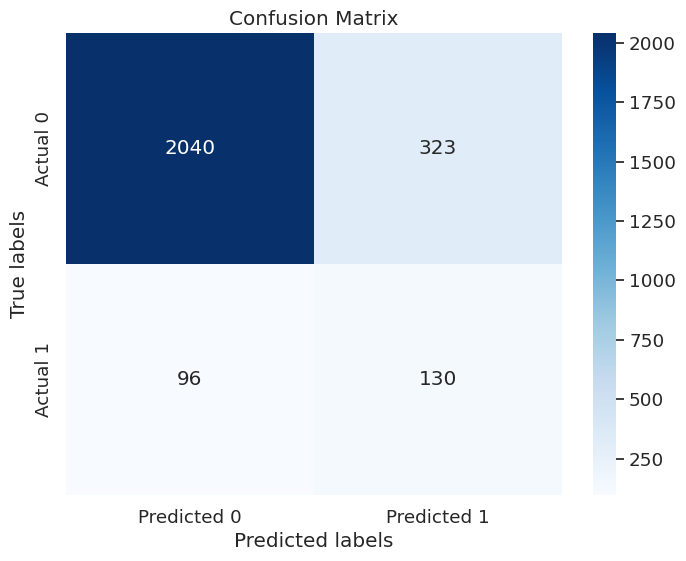

In [ ]:
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(class_weight={0:0.3,1:0.7})
clf = LogisticRegression(class_weight='balanced')

clf.fit(X_train, y_train)
# y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

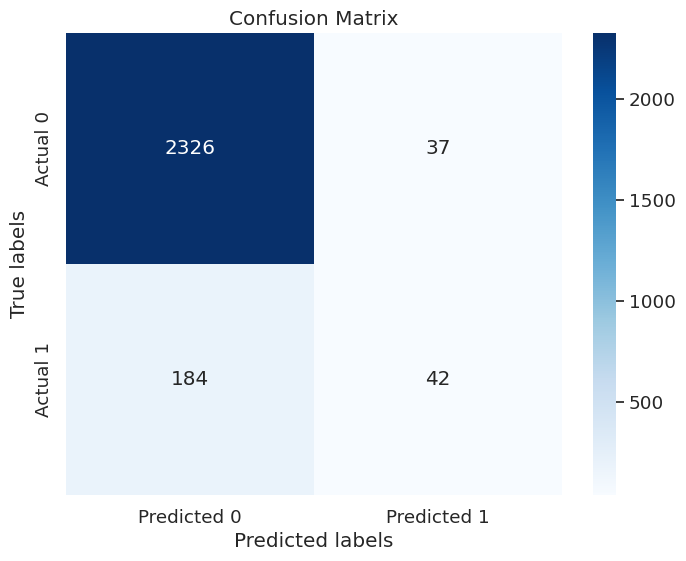

In [ ]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

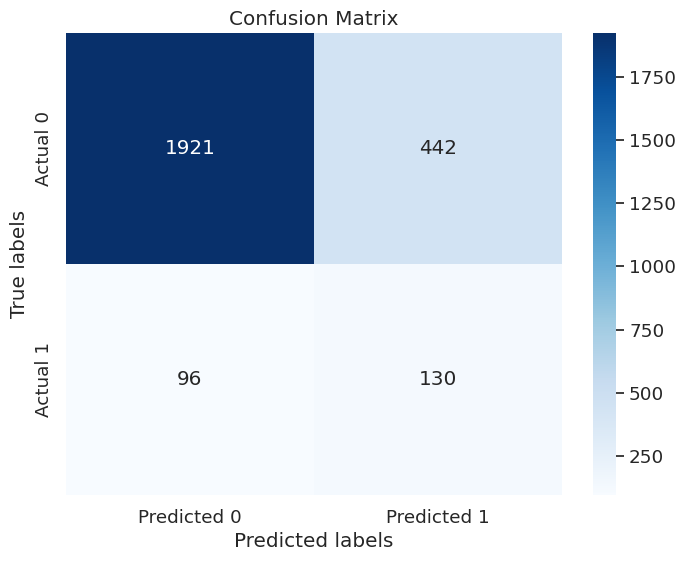

In [ ]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title MLP
import torch # torch

from torchvision import transforms # transform is used for data pre-processing
from torch.utils import data as Data
from torch.utils.data import Dataset # for dataset construction
from torch.utils.data import DataLoader

import torch.optim as optim

import numpy as np

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
XTrain = torch.from_numpy(X_train.values)
# XVal = torch.from_numpy(X_val.values)
XTest = torch.from_numpy(X_test.values)

yTrain = torch.from_numpy(y_train.values)
# yVal = torch.from_numpy(y_val.values)
yTest = torch.from_numpy(y_test.values)

In [ ]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

train_dataset = MyDataset(XTrain, yTrain)
# val_dataset = MyDataset(XVal, yVal)
test_dataset = MyDataset(XTest, yTest)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(XTrain.shape[1], 128)
        # self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
model = SimpleMLP()

loss = nn.CrossEntropyLoss(weight=torch.tensor(sum(y_train)/(np.bincount(y_train)*2), dtype=torch.float32))
# loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for i in range(25):
  model.train()
  train_acc, val_acc = [], []

  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(train_loader):
    X = X.float()
    optimizer.zero_grad()
    outputs = model(X)

    loss_value = loss(outputs, y)
    loss_value.backward()
    optimizer.step()

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()

    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  train_acc.append(accuracy_score(true_labs, pred_labs))
  print(f'Epoch: [{i+1}/25]: training accuracy is {train_acc[-1]:.4f}')

  model.eval()
  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(test_loader):
    X = X.float()
    outputs = model(X)

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()
    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  val_acc.append(accuracy_score(true_labs, pred_labs))
  print(f'Epoch: [{i+1}/25]: validation accuracy is {val_acc[-1]:.4f}')

Epoch: [1/25]: training accuracy is 0.7626
Epoch: [1/25]: validation accuracy is 0.7652
Epoch: [2/25]: training accuracy is 0.7999
Epoch: [2/25]: validation accuracy is 0.7971
Epoch: [3/25]: training accuracy is 0.8222
Epoch: [3/25]: validation accuracy is 0.8206
Epoch: [4/25]: training accuracy is 0.8309
Epoch: [4/25]: validation accuracy is 0.8785
Epoch: [5/25]: training accuracy is 0.8331
Epoch: [5/25]: validation accuracy is 0.8242
Epoch: [6/25]: training accuracy is 0.8346
Epoch: [6/25]: validation accuracy is 0.7447
Epoch: [7/25]: training accuracy is 0.8333
Epoch: [7/25]: validation accuracy is 0.8174
Epoch: [8/25]: training accuracy is 0.8250
Epoch: [8/25]: validation accuracy is 0.8724
Epoch: [9/25]: training accuracy is 0.8382
Epoch: [9/25]: validation accuracy is 0.8482
Epoch: [10/25]: training accuracy is 0.8362
Epoch: [10/25]: validation accuracy is 0.8552
Epoch: [11/25]: training accuracy is 0.8392
Epoch: [11/25]: validation accuracy is 0.7757
Epoch: [12/25]: training acc

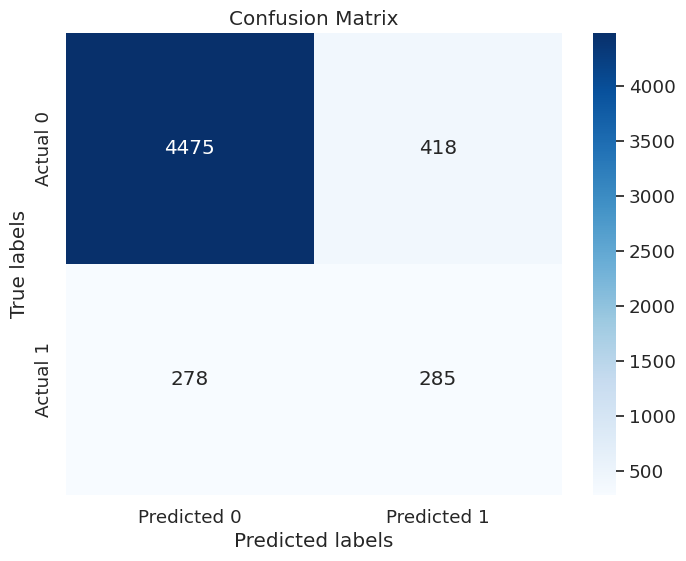

In [ ]:
conf_matrix = confusion_matrix(true_labs, pred_labs)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data'
# df14.to_csv(os.path.join(data_path, 'Data_Xinya_0408.csv'), index=False)
# # os.listdir(data_path)